### SVM

To demonstrate that SVM, it is easiest to work in low dimensions, so we can see the data.

#### Linear SVM Classifier

Lets generate some data in two dimensions, and make them a little seperated.

we'll make a matrix x.
We'll make 20 observations in two classes on two variables.
So we use the matrix command.
And we make them normally distributed.

And then we make a y variable, which is going to be
minus 1 or plus 1.
And there's 10 in each class.

And then for the y equal plus 1 guys, we move the means from
0 to 1 in each of the coordinates.

In [34]:
set.seed(10111)
#n=40 (20 for each class); 2 vars
x<-matrix(rnorm(40),20,2)
y<-rep(c(-1,1),c(10,10))
x[y==1,]<-x[y==1,]+1
#x[c(1:20)]<-x[1:20]+1

In [28]:
#y

In [38]:
#x

In [35]:
#x[c(1:20)]

In [39]:
#x[y==y,]

In [40]:
class(x[y==1,])

[1] "matrix"

In [41]:
print(x[y==0,])

     [,1] [,2]


In [42]:
print(x[y==1,])

            [,1]       [,2]
 [1,]  1.3264276  1.4006172
 [2,]  0.6886685  1.3855096
 [3,]  2.7057305  1.5263118
 [4,]  2.3354574 -0.4977975
 [5,] -1.3406379  2.2054430
 [6,]  1.2445945 -0.1841839
 [7,]  0.7721881  1.5391637
 [8,] -0.3640324  2.3233450
 [9,]  1.6404738  1.1770857
[10,] -1.0440209  1.9501643


Color code the points according to their response.

visible dot coded blue or red
according to whether the response is plus 1 or minus 1.

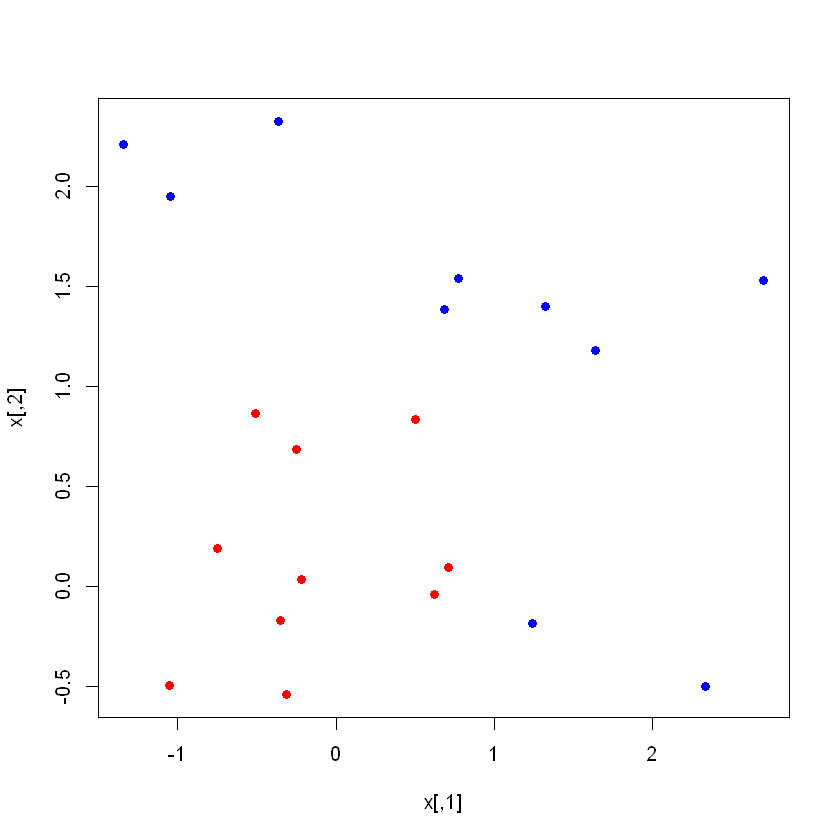

In [5]:
plot(x,col=y+3,pch=19)

Now we wll load the package 'e1071' which constrains the 'svm' function we will use.

We then compute the fit.

Nortice that we have to specify a 'cost' parameter, which is a tuning paramter. 

In [43]:
install.packages('e1071')

Installing package into 'C:/Users/Diego/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\RtmpGO9Bc9\downloaded_packages


In [44]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"


And now, we'll make a data frame of our data. We're going to turn y into a factor variable here.

And now, we make a call to SVM.
So it uses the formula language, just like in our
other example.

So we'll go y twiddle dot.
y is the response.
And the other variables are the predictors.
The data frame will have unpacked the matrix x into two
columns named x1 and x2.
And we tell SVM that the kernel is linear. Of course, we want it for the support vector classify, which
is a linear classify in this case.

And the tune-in parameter is the cost, which
we'll set at 10.
And scale equals false.
For this example, we'll ask it not to
standardize the variables.

In [49]:
#matrix w/ 3 columns, x1,x2,and y
dat<-data.frame(x,y=as.factor(y))
#fit
svm.fit<-svm(y~.,data=dat,kernel='linear',
    cost=10,scale=FALSE)

In [51]:
#dat

In [55]:
#head(svm.fit)

support vectors are the points
that are close to the boundary or on the
wrong side of the boundary.

In [59]:
#number of support vectors is 6
#print(svm.fit)

It shows you the decision boundary.
It looks a little bit jagged here.
It doesn't seem there's much control over the colors.
And as we point out in the book, it breaks with
convention.

And it puts x2 on the horizontal axis and x1 on the
vertical axis.

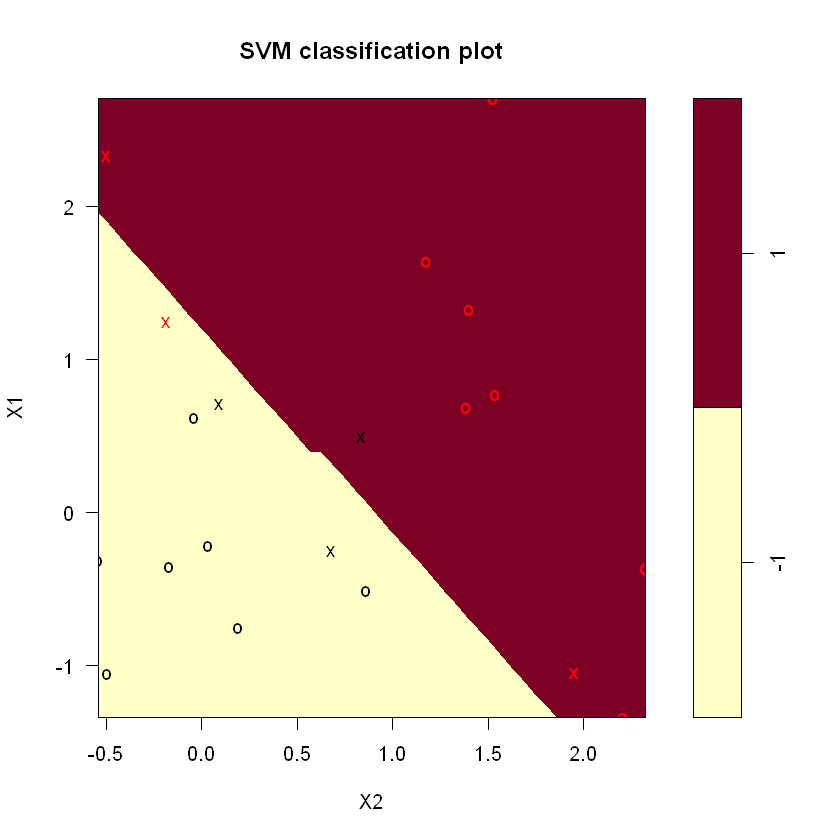

In [58]:
plot(svm.fit,dat)

As mentioned in the chapter, the plot function is somewhat crude, and plots x2 on horizontal axis (unlike with R would do automatically for a matrix). Lets see how we might make our own plot. 

First thing we're going to
do is we're going to make a grid of values or a lattice of
values for x1 and x2 that covers the whole domain on a
fairly fine lattice.

We will write a function to do that, in case we want to reuse it. It uses the handy function 'expand.grid', and produces the coordinates of 'n*n' points on a lattice covering the domain of 'x'.

Having made the lattice, we make a prediction at each point on the lattice. (And then we're going to predict the classified each
point in the lattice and then plot them and color-code the
points, so that we can actually see
the decision boundary.)

We then plot the lattice, color-coded according to the classification.

Now we can see the decision boundary.

The support points (points on the margin, or on the wrong side of the margin) are indexed in the '$index' component of the fit.

1. first of all, we're going to make a
function called make.grid.
And it's going to take in our data matrix x.
And it takes an argument and a number of
points in each direction.
And we're going to ask for 75.
So we're going to ask for a 75 by 75 grid.

2. first thing function does is it uses the Apply function to
get the range of each of the variables in x.

3.And then for each of them, x1 and x2, it uses the Seek
function to go from the lowest value to the upper value and
make a grid of length n. And then, now it's got these x1 and x2 now or each of
length 75 uniformly-spaced values on each of the
coordinates.

4. And then there's this wonderful function called
expand.grid, which takes those two and makes
the lattice for you.
And then that's what gets returned.

In [71]:
#2 == Marigin == "or a matrix 1 indicates rows, 2 indicates columns, c(1, 2) indicates rows and columns"
#columns??
# grange<-apply(x,2,range)
# grange

In [64]:
#?apply

In [70]:
#lowest to highest
#?range

In [72]:
#makes vector size n
#from row 1, col 1 in grange, to row2, col1
#(-1.3 to 2.7)
#increasing order
# x1<-seq(from=grange[1,1],to=grange[2,1],length=10)
# x1

In [73]:
#from row1, col 2, to row 2, col 2
#(-.54  to 2.3)
# x2<-seq(from=grange[1,2],to=grange[2,2],length=10)
# x2

In [74]:
make.grid<-function(x,n=75){
    #range for each var in x
    grange<-apply(x,2,range)
    #use seq to go from lowest to highest
    #make grid of length n
    x1<-seq(from=grange[1,1],to=grange[2,1],length=n)
    x2<-seq(from=grange[1,2],to=grange[2,2],length=n)
    #makes lattice
    expand.grid(X1=x1,X2=x2)
}

And so you can see there's the grid starting.
So it's going through the first coordinate first,
holding the second coordinate fixed.
And it'll be 75 times 75.
So that's 5,625 points are going to be on this grid.

In [80]:
#x<-matrix(rnorm(40),20,2)
#xgrid<-make.grid(x)
#xgrid[1:10,] #comma indicates rows
#tail(xgrid)

We now predict from our SVM foot at the
values on this grid.
So the new data we've given it is xgrid.
And we call the response ygrid.

In [81]:
xgrid<-make.grid(x)
ygrid<-predict(svmfit,xgrid)

So now, what I'm going to do is make a plot.
And I'll plot all the points in xgrid.
And I color them according to what their prediction was.

And there it is.
And so now you actually see the decision boundary.

Do you see the fine lattice?
Each of the points is one of the points on the lattice.
And we've color-coded where they classify.
So you can clearly see the decision boundary.

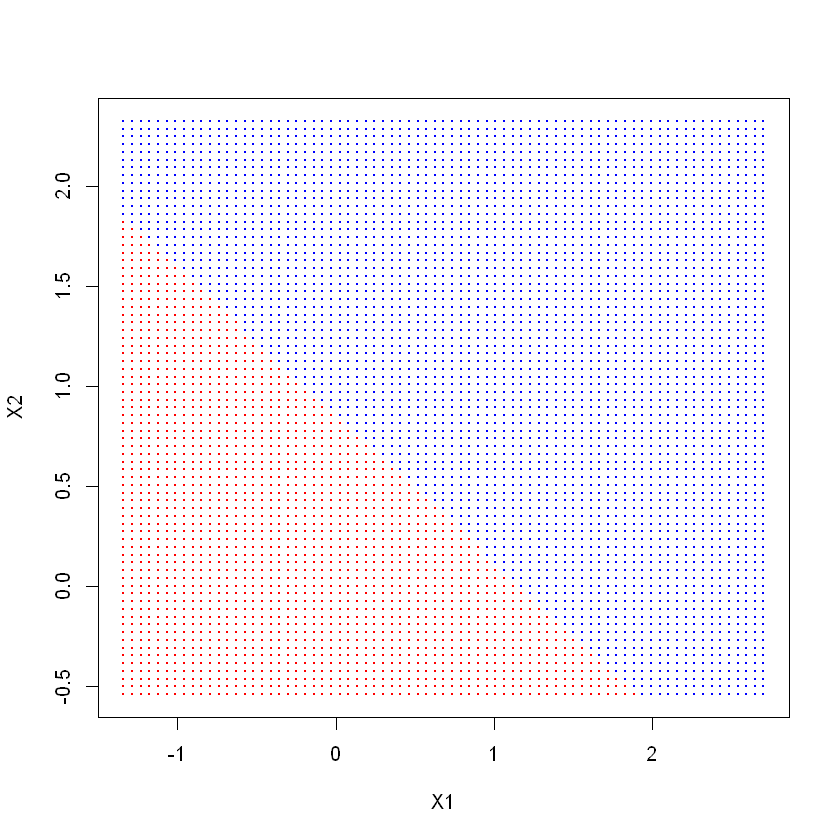

In [82]:
plot(xgrid,col=c('red','blue')[as.numeric(ygrid)],
    pch=20,cex=.2)

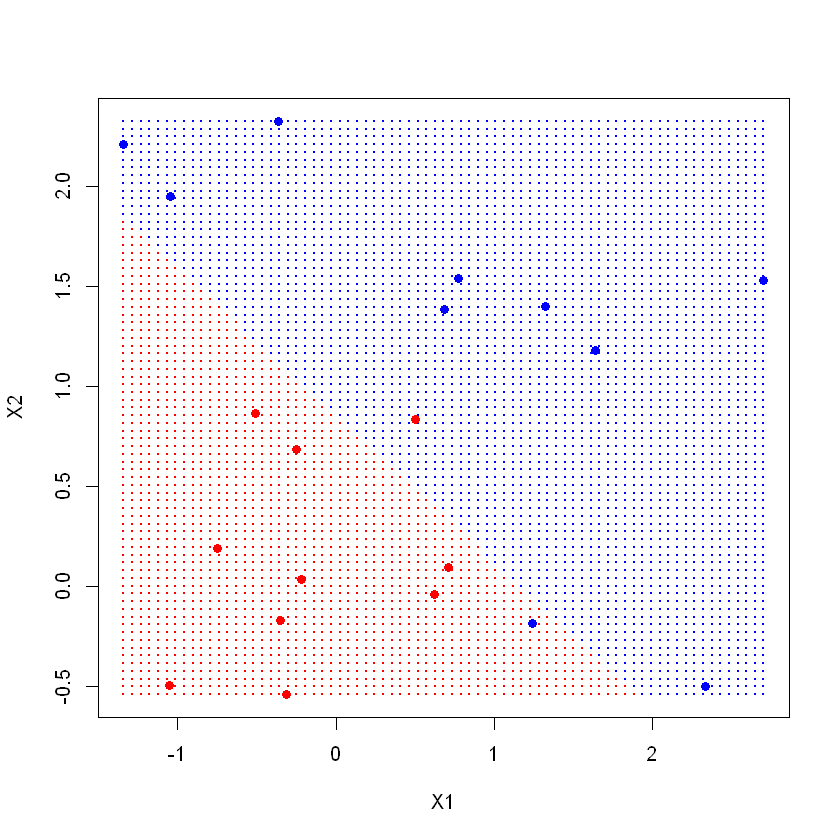

In [83]:
plot(xgrid,col=c('red','blue')[as.numeric(ygrid)],
    pch=20,cex=.2)
#put original points on the plot 
points(x,col=y+3,pch=19)

#### This was using SVM in 2-D

And in fact, on the SVM foot is a component called index.

And that actually tells you which are the support points.
And so we're going to include them in the plot by using the
points function.

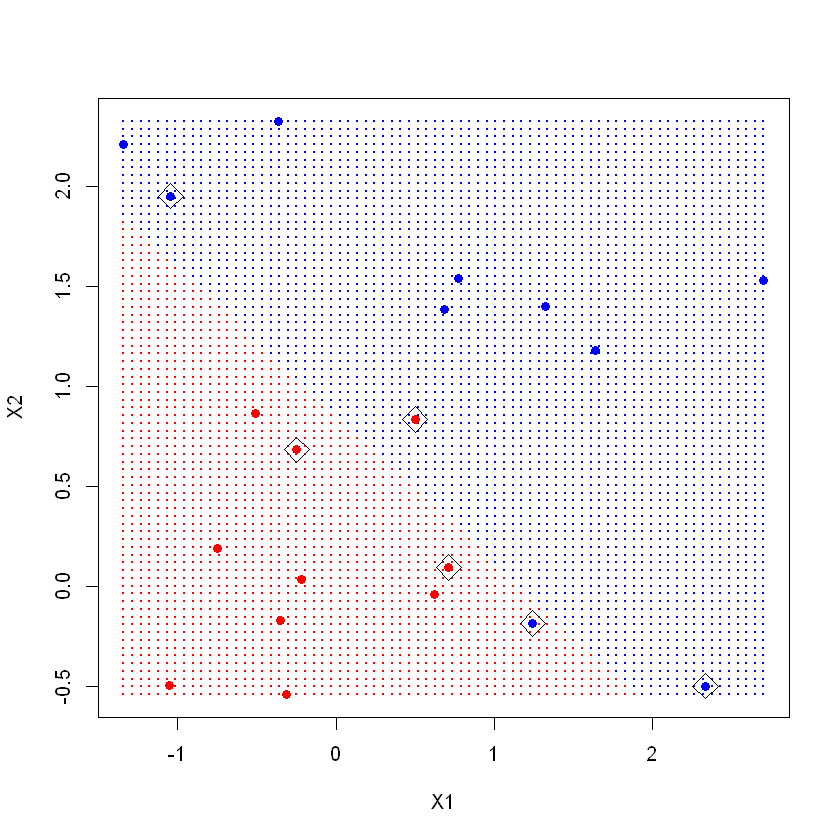

In [88]:
plot(xgrid,col=c('red','blue')[as.numeric(ygrid)],
    pch=20,cex=.2)
#put original points on the plot 
points(x,col=y+3,pch=19)
#support points 
#cex makes symbol different (character expansion)
#these points are key in making decision boundary 
points(x[svmfit$index,],pch=5,cex=2)

The 'svm' function is not fiendly, in that we have to do some work to get back the linear coefficients (to describe linear function), as described in the text.

Problaby the reason is that this only makes sense for linear kernels, and the function is more general.

Here we will use a formula to extract the coefficients; for those interested in where this comes from, have a look at ch12 of ESL. 

We extract the linear coefficients, and then using simple algebra, we include the decision voundary and the two margins.

And so I extracted beta and beta 0, which used the
formulas described in that chapter.

In [90]:
#create betas (coefficients)
beta<-drop(t(svmfit$coefs)%*%x[svmfit$index,])
beta0<-svmfit$rho

And now, I'm going to use the coefficients to draw the
decision boundary.

It's a simple equation.
The equations of the form beta 0 plus beta 1 x1 plus beta 2
x2 equals 0.

And from that equation, you have to figure out a slope and
an intercept for the decision boundary.
So it's a little bit of algebra.

And once you do that, you can use a function ab line.
ab line expects an intercept on a slope.
And you can see we've got it spot on.
There's the decision boundary.

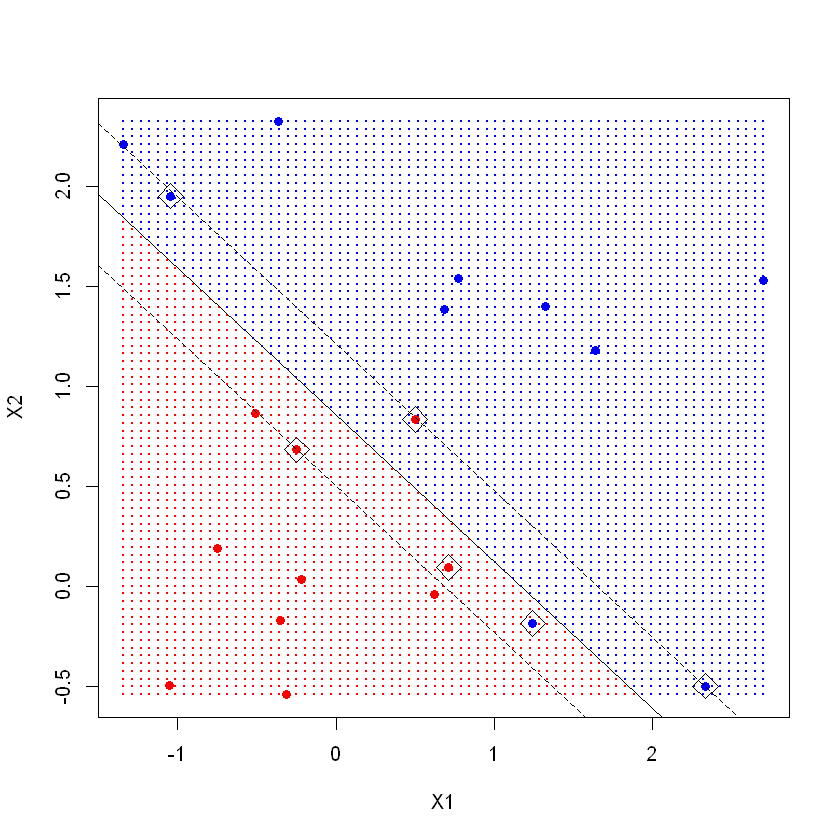

In [93]:
plot(xgrid,col=c('red','blue')[as.numeric(ygrid)],
    pch=20,cex=.2)
points(x,col=y+3,pch=19)
points(x[svmfit$index,],pch=5,cex=2)
#decision boundary 
abline(beta0/beta[2],-beta[1]/beta[2])
#margin +1 (upper margin)
abline((beta0+1)/beta[2],-beta[1]/beta[2],lty=2)
#margin -1
abline((beta0-1)/beta[2],-beta[1]/beta[2],lty=2)

### Non-Linear SVM

Instead, we will run the SVM on some data where a non-linear boundary is called for. 

And again, when fitting the support vector machine, the
cost parameter is a tuning parameter that one would
normally have to select.

We're not going to do this in these sessions, but you can
use cross-validation to select that.
And that's done in the R sessions in the book.


We will use data from ESL:
- which had a canonical example in two
dimensions where the decision boundary was non-linear.
And we're going to use the kernel support vector machine
to try and learn that boundary.

In [94]:
#load directly from url (website)
load(url('http://web.stanford.edu/~hastie/ElemStatLearn/datasets/ESL.mixture.rda'))

In [95]:
#mixture data

#list of these data
names(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

For the moment, the training data are x and y.
And there are some other variables on there

Now first of all, we've already created an x and y for
our previous example.
So I'm just going to get rid of those so that I can attach
this state, this list, which I've now done.

In [96]:
rm(x,y)

In [97]:
# attach this state, this list
attach(ESL.mixture)

These data are also two dimensional. 

Lets plot them and fit a nonlinear SVM, using a radial kernel.

1) Two-dimensional data.
They seem to overlap quite a bit.
But we'll see that there's something special in the
structure of these data.

2) We'll make a data frame with the response y, and we'll turn
that into a factor much like before.

3) And now we'll fit a support vector machine.
But here, the kernel will be radial, and we'll give a cost
parameter of 5.
And again, we won't scale the data.

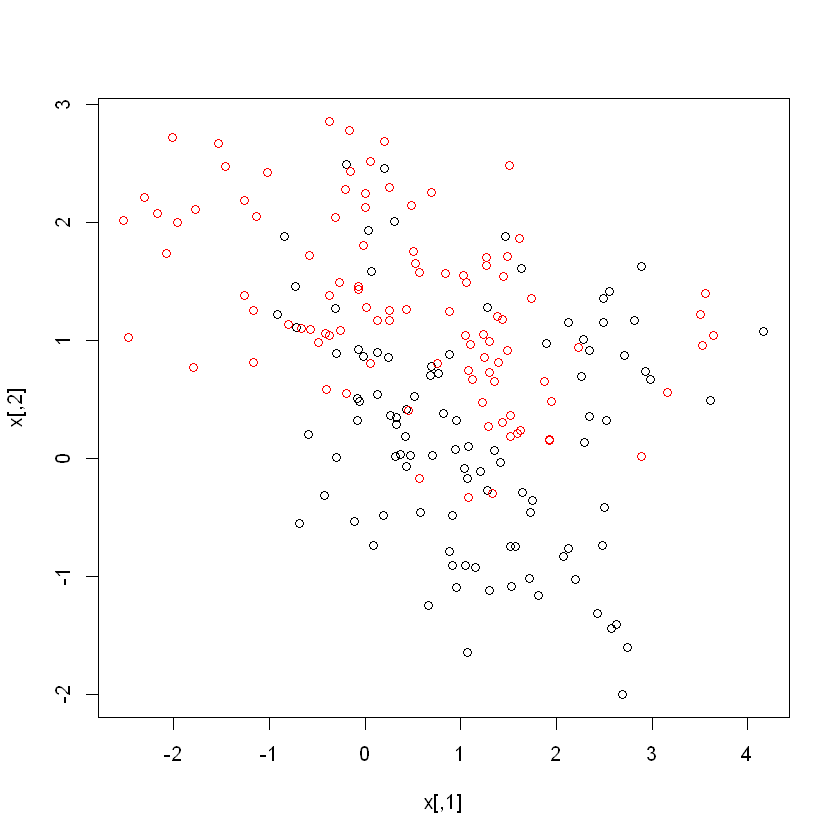

In [98]:
#2-D data
plot(x,col=y+1)

In [108]:
#y == 0s and 1s
#x == x1 and x2 values
dat<-data.frame(y=factor(y),x)
# head(dat)
# tail(dat)

In [104]:
#dat$y

In [105]:
fit<-svm(factor(y)~.,data=dat,scale=FALSE,
        kernel='radial',cost=5)

In [107]:
#fit

Now we are going to create a grid, as before, and make predictions on the grid.

(Now, these data actually came supplied with grid points.
If you look down on the summary on the names that were
on the list, there are two variables, px1 and px2.
And so these are the grid of values for
each of the two variables.
So we don't actually have to use our
function that we created.
We can just use expand.grid directly to
create the grid of values.)

These data have the grid points for each variable included on the data frame. 

And like before, we'll predict the classification at each of
the values on the grid.
And now we'll plot and into the points, and color the
points according to the decision boundary.

And like before, we'll predict the classification at each of
the values on the grid.
And now we'll plot and into the points, and color the
points according to the decision boundary.

We can put our data points in the plot.
And we see where the data lies.

So you can see the decision boundary is non-linear now.
And then the red region's larger to the top, and the
black region's larger down below.

We can put our data points in the plot.
And we see where the data lies.
And you can see that the decision boundary is, to a
large extent, following where the data is, but in a very
non-linear way.

In [110]:
xgrid<-expand.grid(X1=px1,X2=px2)
ygrid<-predict(fit,xgrid)

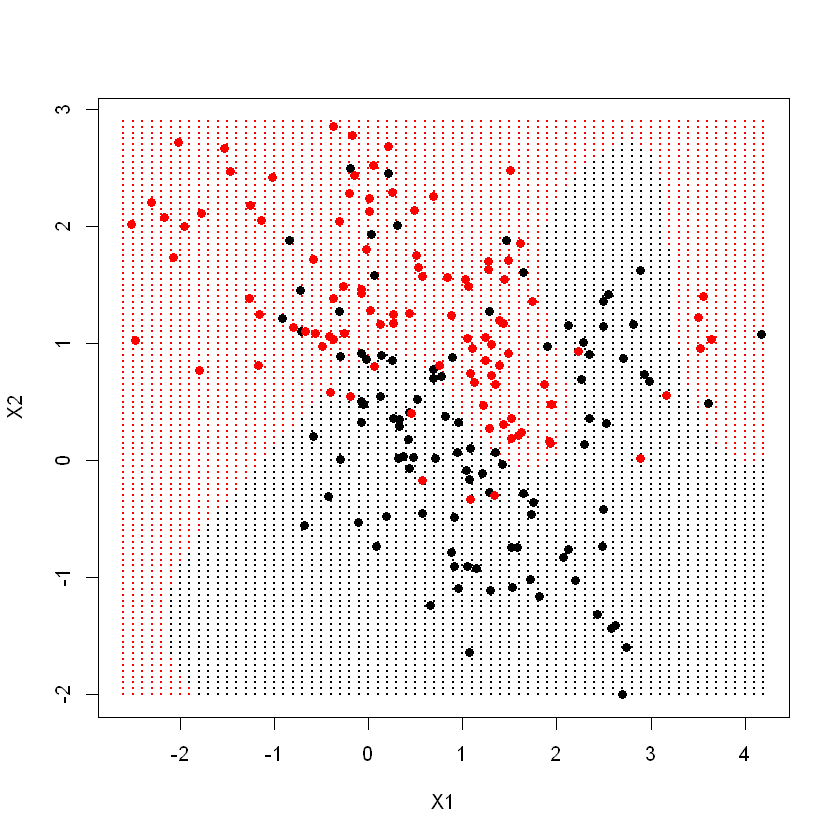

In [112]:
plot(xgrid,col=as.numeric(ygrid),pch=20,
    cex=.2)
points(x,col=y+1,pch=19)

####  Put in a curve that gives decision boundary


We can go further, and have the predict  function produce the actual function estimates at each of our grid points.

We can include the actual decision boundary on the plot by making use of the 'contour' function.

On the dataframe is also 'prob', which is the true probability of class 1 for these data, at the gridpoints. 

If we plot its 0.5 contour, that will give us the _Bayes Decision Boundary_, which is the best one could ever do. 


. (in data frame is also a variable called prob.
And prob actually gives--
these data were simulated, and prob gives the true
probability of a plus 1 versus a minus 1 at every value on
the grid that we have here.)

.1) (We going to use the contour function.)

2) (And we're going begin to plot the contour of prob at a half,
which would be the true decision
boundary for these data.)

3) (predict from our model.
We're going to predict not just class label.
But we're going to predict the function itself.)

4) (And we'll get to the decision boundary that's learned for
these data by plotting the contour of that
function, the 0 contour.
Because that function we classify to plus 1 if it's
positive, otherwise to minus 1.
And so we going to do that for each of these and include them
on the plot.) 

OK, so the first one is we'll just predict
out fit on the grid.

OK, but we tell it decision values equals 2, because we
want to get that function, the actual function and not just
the classification.

And the way it returns that, it returns it as an attribute
of the actual classified values.


In [114]:
func<-predict(fit,xgrid,decision.values=TRUE)


So we have to pull off that attribute.
And so we use attributes function.

That pulls of all the attributes.
And then we access is the one called decision.

In [115]:
func<-attributes(func)$decision

In [117]:
#func

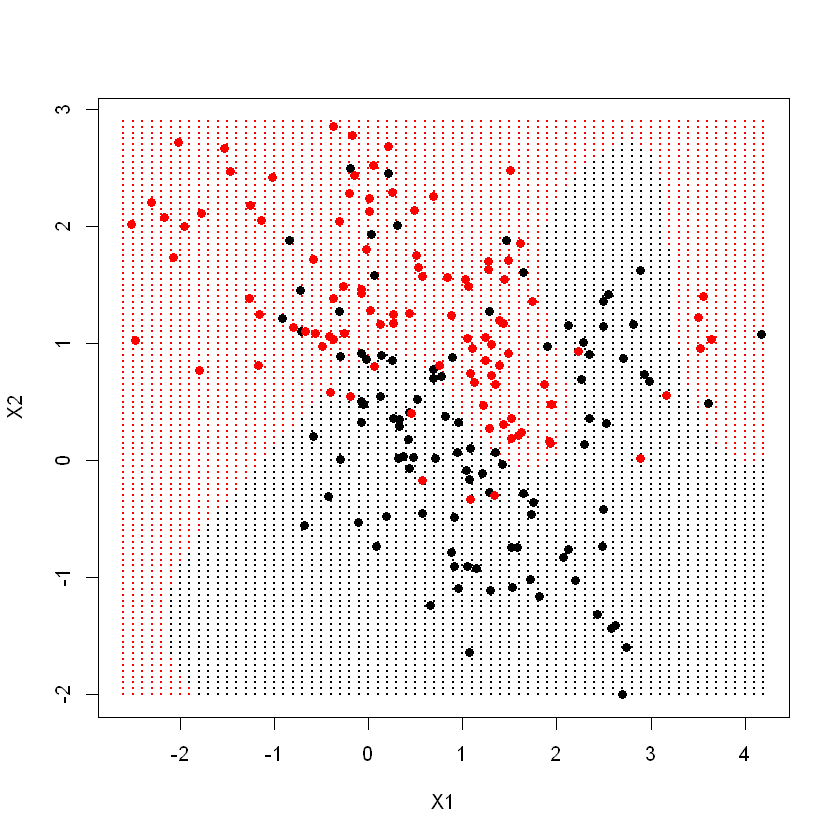

In [120]:
#make same plot as before
xgrid<-expand.grid(X1=px1,X2=px2)
ygrid<-predict(fit,xgrid)
plot(xgrid,col=as.numeric(ygrid),pch=20,
    cex=.2)
points(x,col=y+1,pch=19)

And we use the contour function.
And it requires those two grid sequences as well.

And then it wants the function.
You want a contour in the form of a matrix.

And if you look at the dimensions of px1 px2, you'll
see they're 69 and 99.

And this function we're going to contour at level 0.

And we're going to add it to the plot.

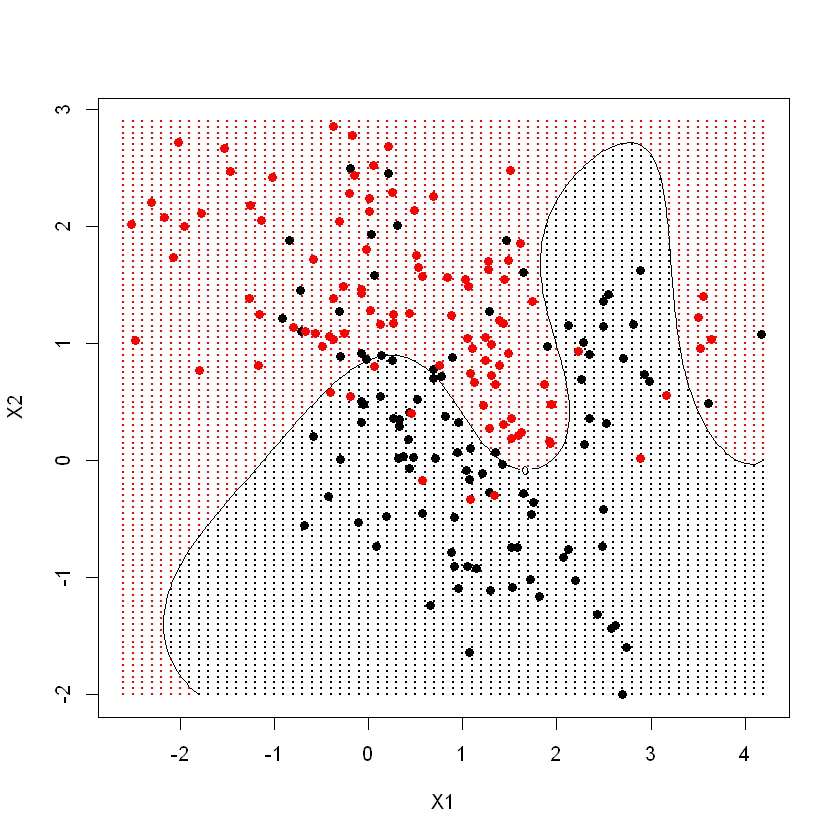

In [121]:
#add contour to plot
xgrid<-expand.grid(X1=px1,X2=px2)
ygrid<-predict(fit,xgrid)
plot(xgrid,col=as.numeric(ygrid),pch=20,
    cex=.2)
points(x,col=y+1,pch=19)

#tracks decision  boundary (good in two dimensions)
contour(px1,px2,matrix(func,69,99),
    level=0,add=TRUE)

And finally, we include the truth, which is the contour of
the probabilities.

That's the 0.5 contour, which would be the decision boundary
in terms of the probabilities.

And so that's the true decision boundary, or what's
called the Bayes decision boundary.

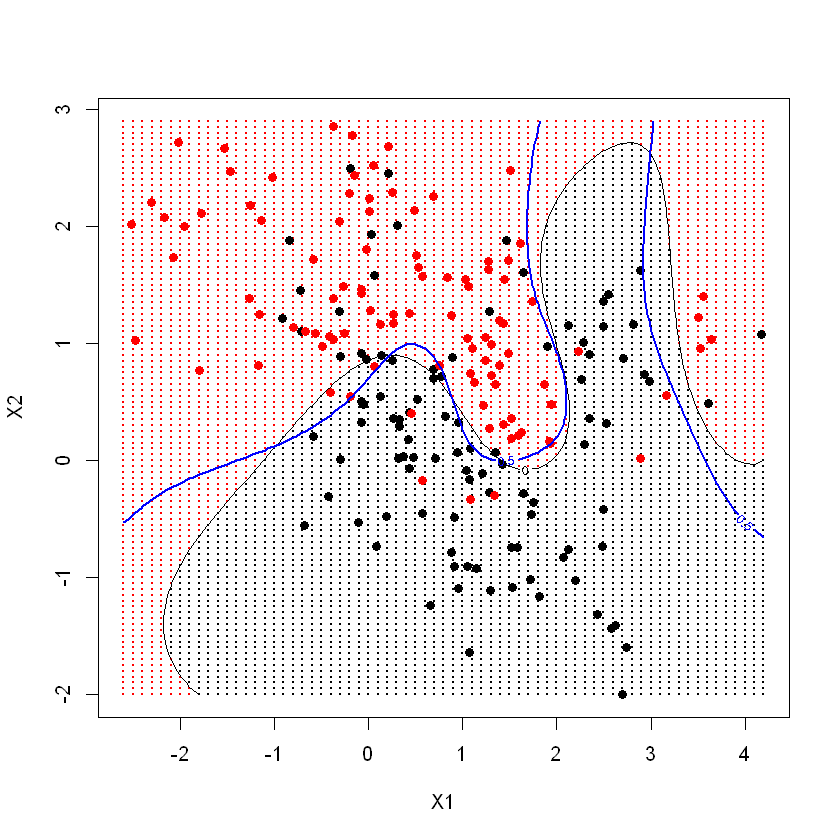

In [124]:
#add contour to plot
xgrid<-expand.grid(X1=px1,X2=px2)
ygrid<-predict(fit,xgrid)
plot(xgrid,col=as.numeric(ygrid),pch=20,
    cex=.2)
points(x,col=y+1,pch=19)

#function applied (our decision boundary)
contour(px1,px2,matrix(func,69,99),
    level=0,add=TRUE)
#Bayes Therom boundary (TRUTH)
contour(px1,px2,matrix(prob,69,99),
    level=.5,add=TRUE, col='blue',lwd=2)

But you can see our non-linear support vector machine has got
pretty close to that, especially in the regions
where we've got data.